# Telco Customer Churn notebook

This notebook analyzes customer churn data from a telecom company. It includes:

- Data loading and cleaning
- Exploratory Data Analysis (EDA) of customer demographics and services
- Visualization of key factors affecting churn including:
  - Customer tenure
  - Contract types 
  - Senior citizen status
  - Gender distribution
  - Partner/dependent status
  - Financial metrics
- Predictive modeling using Logistic Regression to forecast customer churn

The analysis reveals important patterns in customer behavior and identifies key factors that influence customer churn rates.


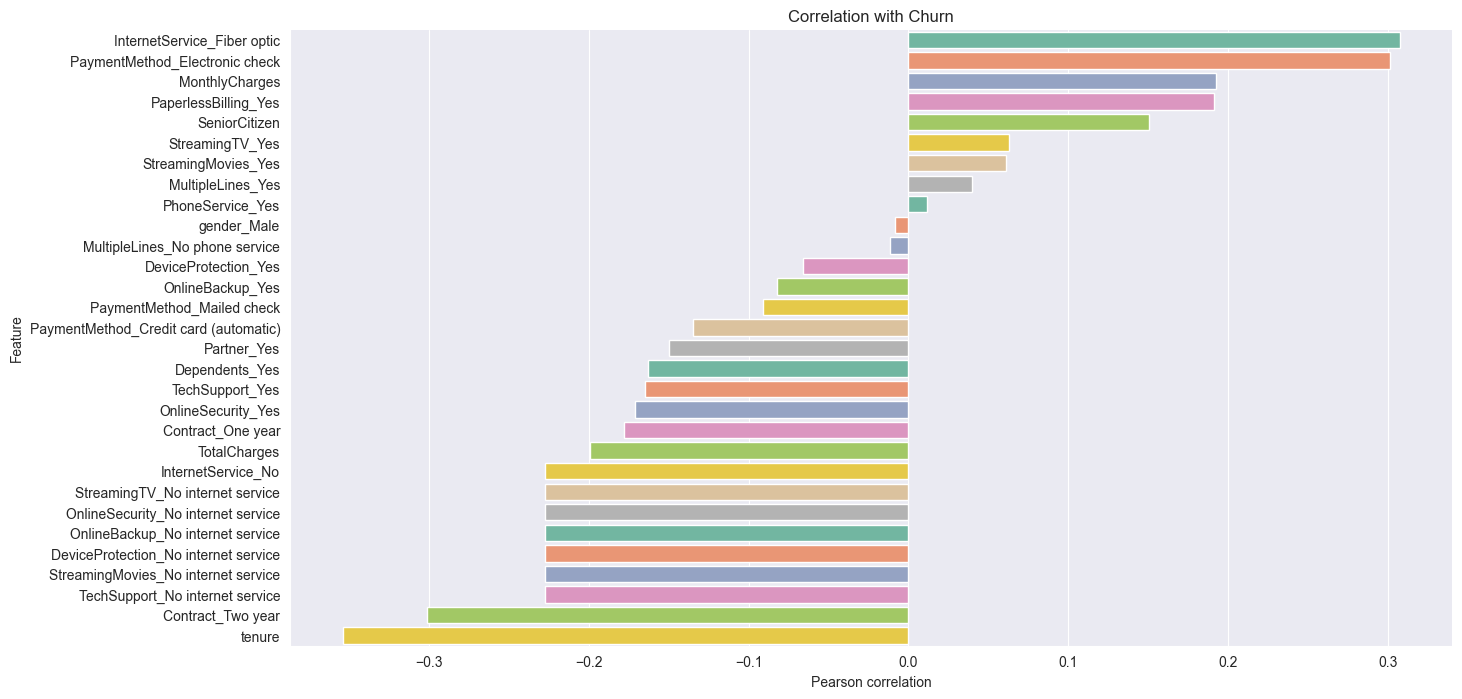

In [1]:
from src.data import load_csv, basic_clean
from src.features import build_features
from src.viz import Viz

df = load_csv('../data/telco-customer-churn.csv')
df_clean = basic_clean(df)
X_dummies = build_features(df_clean)
viz = Viz()
viz.plot_corr_with_target(X_dummies, 'Churn')

### Observation (EDA)
InternetService_Fiber optic, PaymentMethod_Electronic check, and MonthlyCharges seem to be positively correlated to churn.

On the contrary, Tenure, Contract_Two year, and InternetService_No seem to be negatively correlated.

We will explore these values to find other clues

We will first find the demographic of our customers.

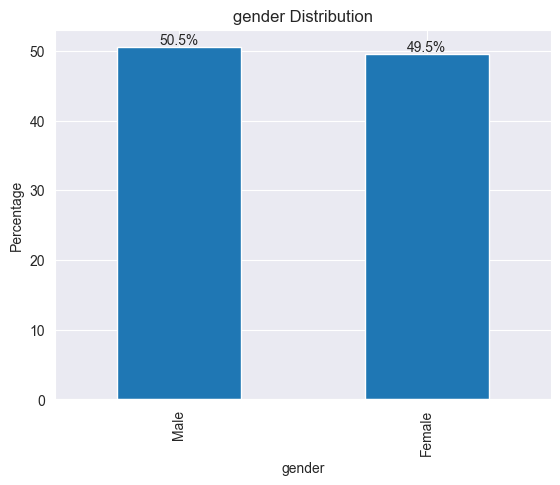

In [2]:
viz.simple_comparison_bar_plot(df_clean, 'gender')

1. Gender Distribution - About half of the customers are male and the other half female

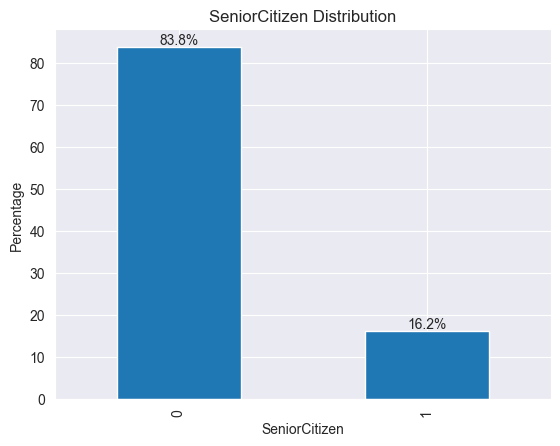

In [3]:
viz.simple_comparison_bar_plot(df_clean, 'SeniorCitizen')

2. Senior Citizen Percentage - About 16.2% of our customers are Senior Citizen, and about 83.8% are not.

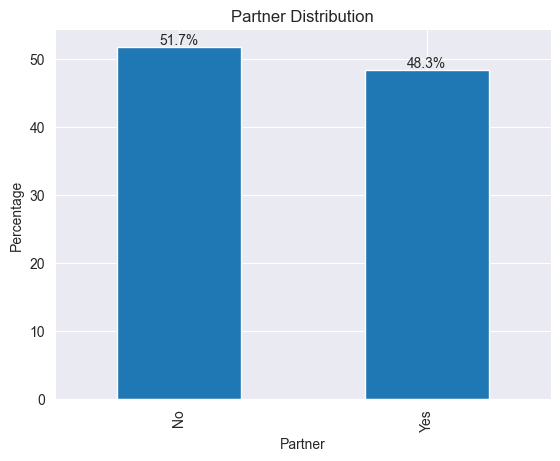

In [4]:
viz.simple_comparison_bar_plot(df_clean, 'Partner')

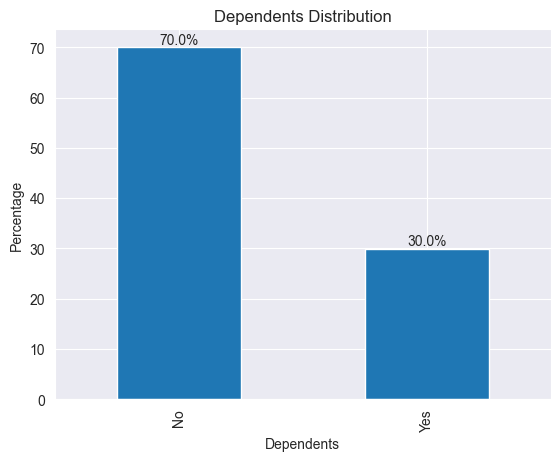

In [5]:
viz.simple_comparison_bar_plot(df_clean, 'Dependents')

3. Do they have a partner, or are they dependent - About partner distribution it's about 50/50 as for dependents it seems 70/30

We will now look at customers' length of contracts and tenure

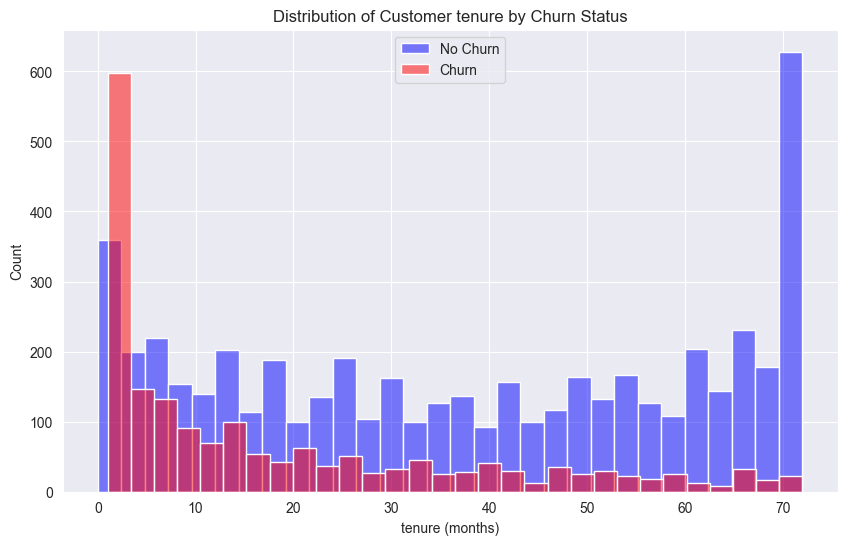

In [6]:
viz.superposed_bar_plot(df_clean, 'Churn', 'tenure')

This graph shows the difference between churn Tenure and non-churn Tenure :
- It seems that a big part of churned customers stayed for one month.

We will now look at month, year, and 2-year contracts

<Figure size 1000x600 with 0 Axes>

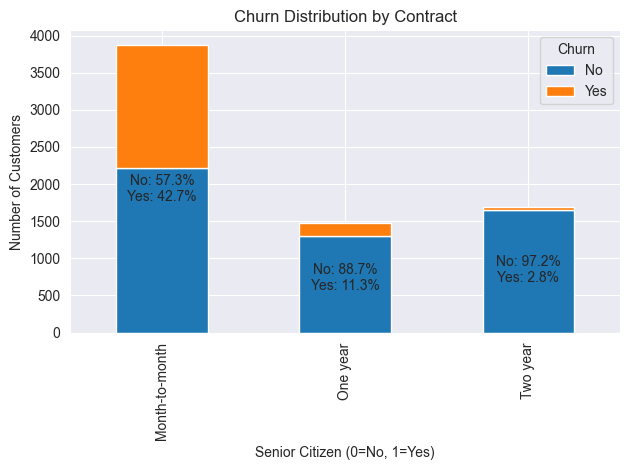

In [7]:
viz.stacked_bar_plot(df_clean, 'Contract', 'Churn')

This graph shows the distribution of churned vs. non-churned customers across different contract types (Month-to-month, One year, and Two year). We can observe that:

1. Month-to-month contracts have the highest churn rate
2. One-year and two-year contracts have significantly lower churn rates
3. Two-year contracts show the lowest churn rate overall

<Figure size 1000x600 with 0 Axes>

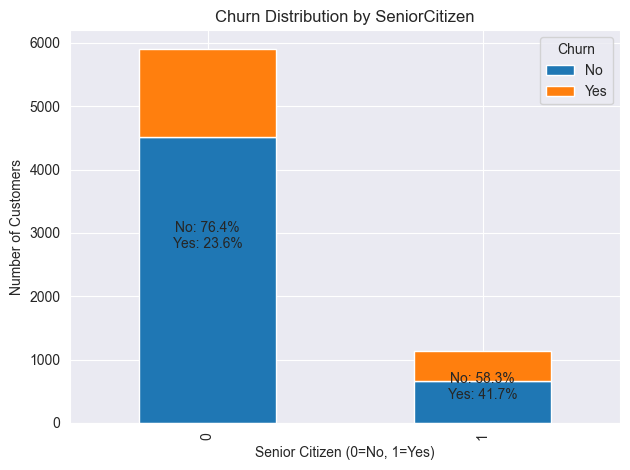

In [8]:
viz.stacked_bar_plot(df_clean, 'SeniorCitizen', 'Churn')

We can see that 41.7% of senior citizens churned.

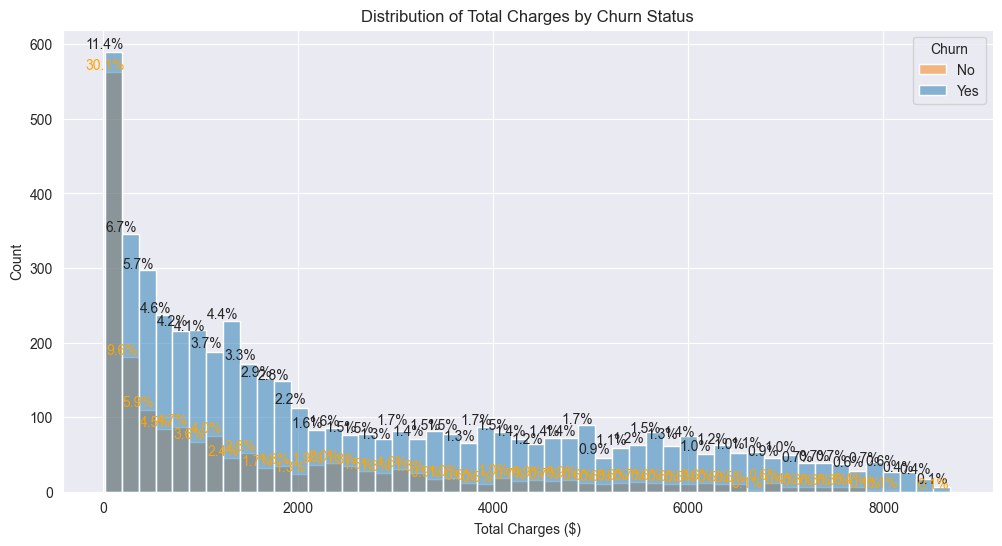

In [9]:
viz.total_charges_distribution(df_clean)

### Predictions

In [10]:
from src.models import Models
from sklearn.metrics import accuracy_score

1. Logistic Regression

In [11]:
logregModel = Models(df_clean, X_dummies)
logreg = logregModel.logistic_regression()
predictions = logregModel.predict_lr(logreg)
print(f'Accuracy: {accuracy_score(logregModel.y_test, predictions):.3f}')

Accuracy: 0.795


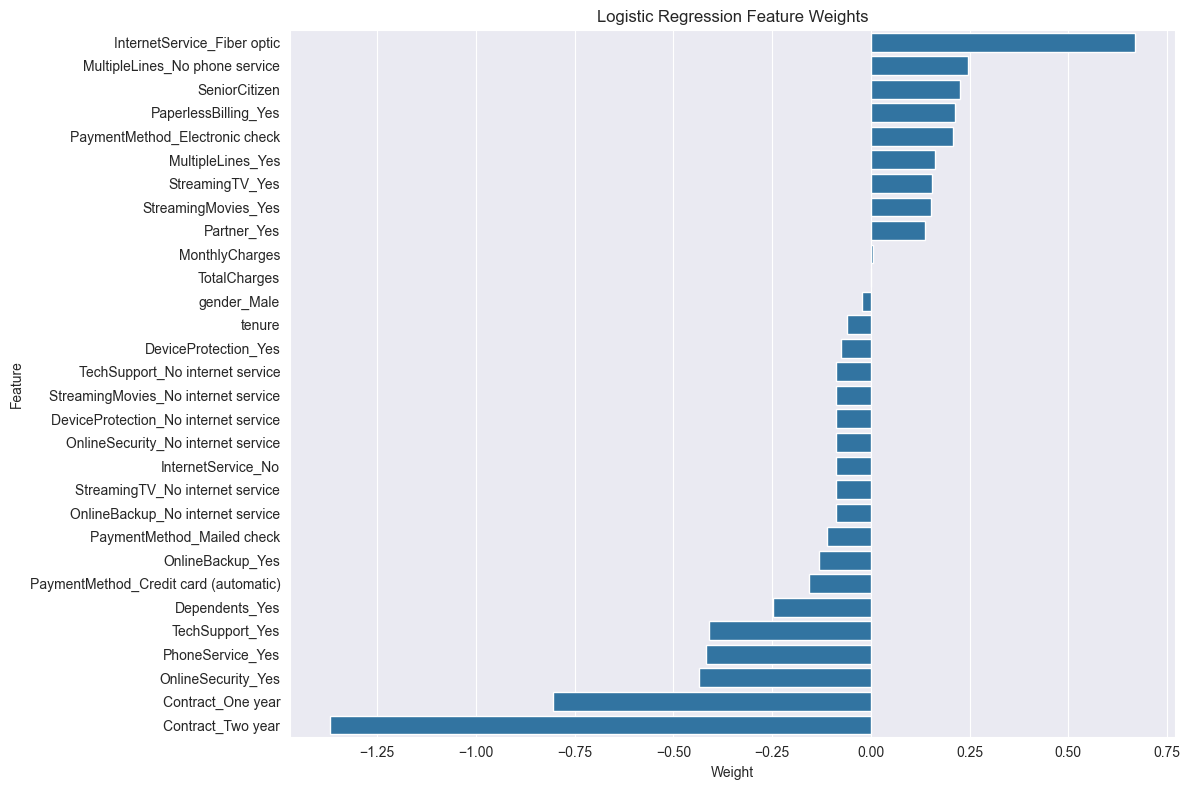

In [12]:
viz.feature_weights_bar(logregModel.get_feature_weights(logreg))

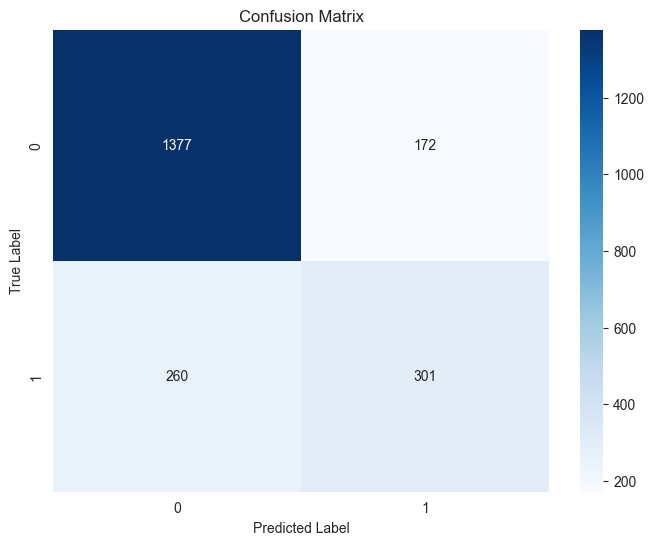

Accuracy: 0.795
Precision: 0.636
Specificity: 0.889
F1 Score: 0.582


In [13]:
viz.confusion_matrix(predictions, logregModel.y_test)

In [14]:
viz.roc_curve(logreg.predict_proba(logregModel.X_test)[:, 1], logregModel.X_test, logregModel.y_test)

ValueError: continuous-multioutput format is not supported

<Figure size 800x600 with 0 Axes>